# Demo

In [1]:
import tensorflow as tf
import numpy as np
import pickle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from dataloader import *
from densenet import densenet
from covidnet import covidnet
from atten_resnet import atten_resnet
from train import *

we prepared a sharelink from google dive:

https://drive.google.com/drive/folders/1aw7nqrXkBRZp94Ef04s3xeH-2gQRPb97?usp=sharing

Add a shortcut to your own google drive and mount drive on google colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##load data

In [3]:
#DIRECTORIES
path_metadata = "/content/drive/MyDrive/dataset/metadata.csv" ## directory of dataframe of image directories and classes
path_pneumonia = "/content/drive/MyDrive/dataset/Dataset/pneumonia" ## directory of images of pneumonia classes
directory_dataset='/content/drive/MyDrive/dataset/Dataset' ## directory of all classes folders

image_size=(224, 224)
batch_size = 32

## call a function to load datasets
_,_,_, _,_,_,_,_,demo_dataset,demo_true,demo_true_oh = data_func(
    batch_size ,
    path_metadata ,
    path_pneumonia ,
    directory_dataset,
    image_size )

Found 2928 validated image filenames belonging to 3 classes.
Found 732 validated image filenames belonging to 3 classes.
Found 915 validated image filenames belonging to 3 classes.
Found 50 validated image filenames belonging to 3 classes.


##Visualizing

In [4]:
import cv2
from google.colab.patches import cv2_imshow

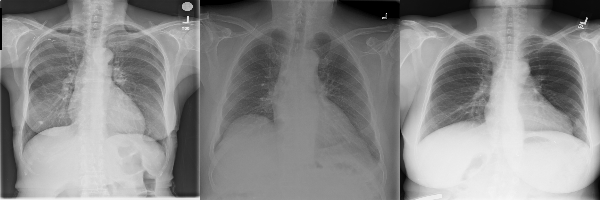

True

In [5]:
#sample image of normal class

img1 = cv2.imread(demo_dataset.filepaths[48])
imS1 = cv2.resize(img1, (200, 200))

img2 = cv2.imread(demo_dataset.filepaths[9])
imS2 = cv2.resize(img2, (200, 200))

img3 = cv2.imread(demo_dataset.filepaths[10])
imS3 = cv2.resize(img3, (200, 200))



Hori = np.concatenate((imS1, imS2, imS3), axis=1)

cv2_imshow(Hori)
cv2.imwrite('normal_class.png', Hori)


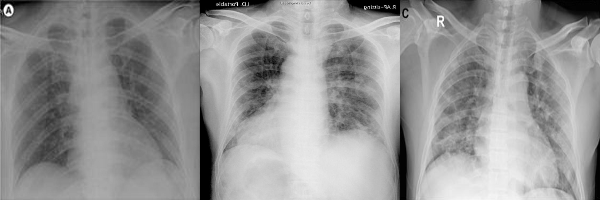

True

In [6]:
#sample image of covid class

img1 = cv2.imread(demo_dataset.filepaths[39])
imS1 = cv2.resize(img1, (200, 200))

img2 = cv2.imread(demo_dataset.filepaths[43])
imS2 = cv2.resize(img2, (200, 200))

img3 = cv2.imread(demo_dataset.filepaths[15])
imS3 = cv2.resize(img3, (200, 200))



Hori = np.concatenate((imS1, imS2, imS3), axis=1)

cv2_imshow(Hori)
cv2.imwrite('covid_class.png', Hori)


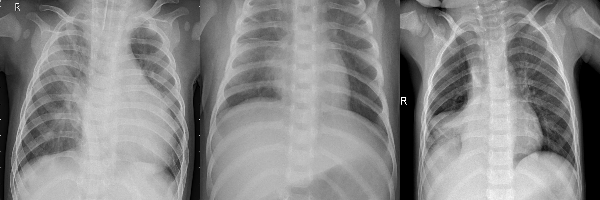

True

In [7]:
#sample image of pneumonia class
img1 = cv2.imread(demo_dataset.filepaths[0])
imS1 = cv2.resize(img1, (200, 200))

img2 = cv2.imread(demo_dataset.filepaths[1])
imS2 = cv2.resize(img2, (200, 200))

img3 = cv2.imread(demo_dataset.filepaths[5])
imS3 = cv2.resize(img3, (200, 200))



Hori = np.concatenate((imS1, imS2, imS3), axis=1)

cv2_imshow(Hori)
cv2.imwrite('pneumonia_class.png', Hori)


##DenseNet

In [13]:
input_shape = 224, 224, 3
n_classes = 3
# opt = Adam(learning_rate = 0.001)
checkpoint_filepath_dense =  '/content/dense'

model1 = densenet(input_shape,n_classes)
model1.load_weights(checkpoint_filepath_dense)
# model1.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

with tf.device('/gpu:0'):
  perd_dense = model1.predict(demo_dataset)

50/50 [==============================] - 23s 253ms/step


In [14]:
y_dense = np.argmax(perd_dense,axis=1)
y_dense_oh = convert_to_one_hot(y_dense,3).T

In [15]:
accuracy = accuracy_score(demo_true_oh, y_dense_oh)

print('Accuracy = {:.2f}%'.format(accuracy*100))
print(classification_report(demo_true_oh, y_dense_oh,target_names=['0','1','2']))

Accuracy = 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50
 samples avg       1.00      1.00      1.00        50



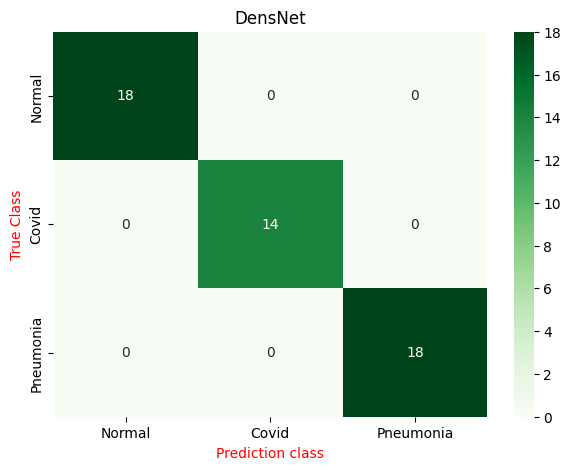

In [16]:
cf_matrix = confusion_matrix(demo_true,y_dense)

plt.figure(figsize = (7,5))
plt.title('DensNet')
x_axis_labels = ['Normal','Covid','Pneumonia']
sns.heatmap(cf_matrix, annot=True,  fmt='g', cmap="Greens", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('Prediction class', color = 'r')
plt.ylabel(ylabel='True Class', color="r")
plt.savefig('h_dense_demo.png')

##CovidNet

In [18]:
input_shape = 224, 224, 3
n_classes = 3
# opt = Adam(learning_rate = 0.0002)
checkpoint_filepath_covid =  '/content/covid'

model2 = covidnet(input_shape,n_classes)
model2.load_weights(checkpoint_filepath_covid)
# model2.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

with tf.device('/gpu:0'):
  perd_covid = model2.predict(demo_dataset)

50/50 [==============================] - 2s 16ms/step


In [19]:
y_covid = np.argmax(perd_covid,axis=1)
y_covid_oh = convert_to_one_hot(y_covid,3).T

In [20]:
accuracy = accuracy_score(demo_true_oh, y_covid_oh)

print('Accuracy = {:.2f}%'.format(accuracy*100))
print(classification_report(demo_true_oh, y_covid_oh,target_names=['0','1','2']))

Accuracy = 98.00%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        18

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 samples avg       0.98      0.98      0.98        50



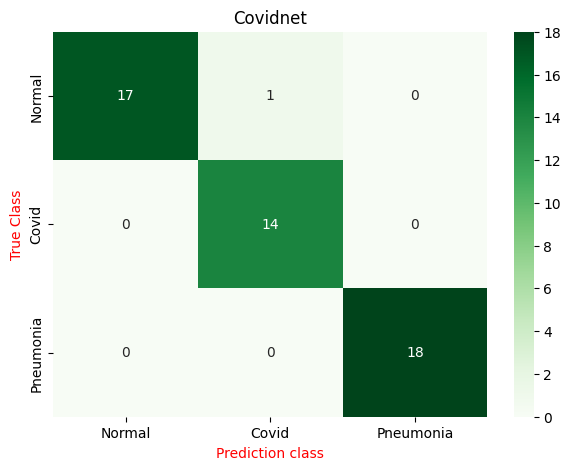

In [21]:
cf_matrix = confusion_matrix(demo_true,y_covid)

plt.figure(figsize = (7,5))
plt.title('Covidnet')
x_axis_labels = ['Normal','Covid','Pneumonia']
sns.heatmap(cf_matrix, annot=True,  fmt='g', cmap="Greens", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('Prediction class', color = 'r')
plt.ylabel(ylabel='True Class', color="r")
plt.savefig('h_covid_demo.png')

##Attention-Resnet

In [23]:
input_shape = 224, 224, 3
n_classes = 3
# opt = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True, weight_decay=0.0001)
checkpoint_filepath_atten =  '/content/atten'

model3 = atten_resnet(input_shape,n_classes)
model3.load_weights(checkpoint_filepath_atten)
# model3.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

with tf.device('/gpu:0'):
  perd_atten = model3.predict(demo_dataset)

50/50 [==============================] - 4s 19ms/step


In [24]:
y_atten = np.argmax(perd_atten,axis=1)
y_atten_oh = convert_to_one_hot(y_atten,3).T

In [25]:
accuracy = accuracy_score(demo_true_oh, y_atten_oh)

print('Accuracy = {:.2f}%'.format(accuracy*100))
print(classification_report(demo_true_oh, y_atten_oh,target_names=['0','1','2']))

Accuracy = 98.00%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        18

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 samples avg       0.98      0.98      0.98        50



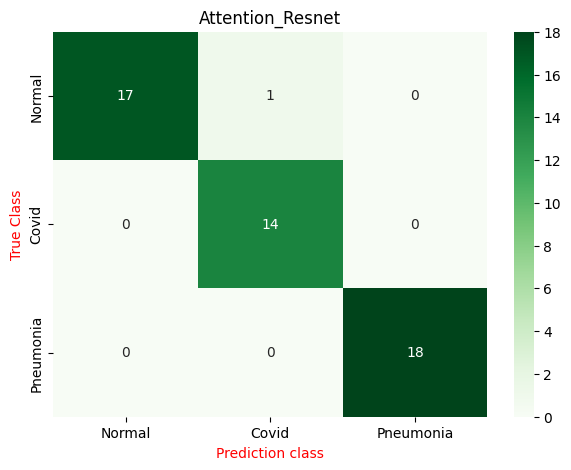

In [35]:
cf_matrix = confusion_matrix(demo_true,y_atten)

plt.figure(figsize = (7,5))
plt.title('Attention_Resnet')
x_axis_labels = ['Normal','Covid','Pneumonia']
sns.heatmap(cf_matrix, annot=True,  fmt='g', cmap="Greens", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('Prediction class', color = 'r')
plt.ylabel(ylabel='True Class', color="r")
plt.savefig('h_atten_demo.png')

##Ensemble

In [28]:
with open('densenet.pkl', 'rb') as fp:
    densnet = pickle.load(fp)

with open('covidnet.pkl', 'rb') as fp:
    covidnet = pickle.load(fp)

with open('attenresnet.pkl', 'rb') as fp:
    residual_attention = pickle.load(fp)

In [29]:
acc_dens = max(densnet['val_accuracy'])
acc_cov = max(covidnet['val_accuracy'])
acc_res = max(residual_attention['val_accuracy'])
beta = min(acc_dens, acc_cov, acc_res)

print("acc_dens:",acc_dens)
print("acc_cov:",acc_cov)
print("acc_res:",acc_res)
print("beta:",beta)

acc_dens: 0.9616477489471436
acc_cov: 0.9232954382896423
acc_res: 0.9161931872367859
beta: 0.9161931872367859


In [30]:
alfa_dens = acc_dens - beta
alfa_cov = acc_cov - beta
alfa_res = acc_res - beta
alfa = [alfa_dens, alfa_cov, alfa_res]

print("alfa_dens:", alfa_dens)
print("alfa_cov:", alfa_cov)
print("alfa_res:", alfa_res)

alfa_dens: 0.045454561710357666
alfa_cov: 0.007102251052856445
alfa_res: 0.0


In [31]:
dens = perd_dense * alfa_dens
cov = perd_covid * alfa_cov
res = perd_atten * alfa_res

ansemble = dens + cov + res

In [32]:
y_ensymble = np.argmax(ansemble,axis=1)
y_ensymble_oh = convert_to_one_hot(y_ensymble,3).T

In [33]:
accuracy = accuracy_score(demo_true_oh, y_ensymble_oh)

print('Accuracy = {:.2f}%'.format(accuracy*100))
print(classification_report(demo_true_oh, y_ensymble_oh,target_names=['0','1','2']))

Accuracy = 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50
 samples avg       1.00      1.00      1.00        50



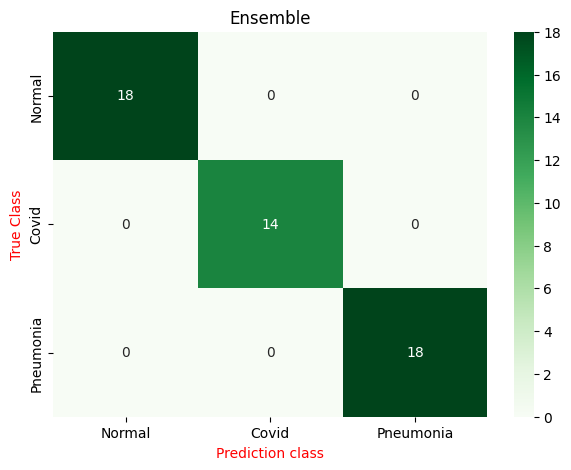

In [36]:
cf_matrix = confusion_matrix(demo_true,y_ensymble)

plt.figure(figsize = (7,5))
plt.title('Ensemble')
x_axis_labels = ['Normal','Covid','Pneumonia']
sns.heatmap(cf_matrix, annot=True,  fmt='g', cmap="Greens", xticklabels=x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('Prediction class', color = 'r')
plt.ylabel(ylabel='True Class', color="r")
plt.savefig('h_ensemble_demo.png')